<a href="https://colab.research.google.com/github/maverick98/Group4Capstone/blob/main/Inference_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wandb
!wandb login

ea166aa37d5e7c2f0ad3c5fadfe7a4e9f37dfff0

# Import necessary libraries

In [3]:
import numpy as np
import string
import tensorflow as tf
from tensorflow import math, matmul, reshape, shape, transpose, cast, float32
from tensorflow.data import Dataset
from tensorflow.keras.layers import Embedding,Dense, Layer,TextVectorization
from tensorflow.keras.backend import softmax
from pickle import load, dump, HIGHEST_PROTOCOL
from sklearn.utils import shuffle
from numpy import savetxt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import convert_to_tensor, int64
from tensorflow.keras.layers import LayerNormalization,   ReLU, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import LearningRateSchedule
from tensorflow.keras.metrics import Mean
from tensorflow import data, train,  reduce_sum,  equal, argmax,GradientTape, function
from tensorflow.keras.losses import sparse_categorical_crossentropy

from time import time
from pickle import dump
from tensorflow import    linalg, ones, maximum, newaxis
from tensorflow.keras import Model
from pickle import load
from tensorflow import Module
from tensorflow import   TensorArray, argmax,  transpose
from matplotlib.pylab import plt
from numpy import arange

from keras.utils import to_categorical
import numpy as np
from numpy import array
import pandas as pd
import cv2
from glob import glob
import PIL
#import time
from tqdm import tqdm
import os
#import gensim
from sklearn.model_selection import train_test_split
from nltk.translate.bleu_score import sentence_bleu
from PIL import Image
import random
from importlib.machinery import SourceFileLoader
from os.path import join
from google.colab import drive

# Check if connected to GPU

In [4]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Apr  7 09:38:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Mount Google Drive

In [5]:


ROOT = "/content/drive"
drive.mount(ROOT,force_remount=False)




Mounted at /content/drive


# Download the flickr8k dataset

In [ ]:
#Uncomment for the first time.
!wget  https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_Dataset.zip
!wget https://github.com/jbrownlee/Datasets/releases/download/Flickr8k/Flickr8k_text.zip

In [7]:
PROJ = "MyDrive/Capstone/src" 
PROJECT_PATH = join(ROOT, PROJ)
print("PROJECT_PATH from your Google Drive is ",PROJECT_PATH)
!rm -rf "{PROJECT_PATH}"
!mkdir  "{PROJECT_PATH}"

PROJECT_PATH from your Google Drive is  /content/drive/MyDrive/Capstone/src


# Store it under dataset directory

In [8]:
CUR_DIR='/content'


In [9]:
!rm -rf {CUR_DIR}/dataset
!mkdir -p {CUR_DIR}/dataset/images
!mkdir -p {CUR_DIR}/dataset/texts
!unzip  {CUR_DIR}/Flickr8k_text.zip -d {CUR_DIR}/dataset/texts
!unzip {CUR_DIR}/Flickr8k_Dataset.zip -d {CUR_DIR}/dataset/images

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/images/__MACOSX/Flicker8k_Dataset/._342872408_04a2832a1b.jpg  
  inflating: /content/dataset/images/Flicker8k_Dataset/3429142249_d09a32e291.jpg  
  inflating: /content/dataset/images/__MACOSX/Flicker8k_Dataset/._3429142249_d09a32e291.jpg  
  inflating: /content/dataset/images/Flicker8k_Dataset/3429194423_98e911a101.jpg  
  inflating: /content/dataset/images/__MACOSX/Flicker8k_Dataset/._3429194423_98e911a101.jpg  
  inflating: /content/dataset/images/Flicker8k_Dataset/3429351222_17ae744daf.jpg  
  inflating: /content/dataset/images/__MACOSX/Flicker8k_Dataset/._3429351222_17ae744daf.jpg  
  inflating: /content/dataset/images/Flicker8k_Dataset/3429351964_531de1bf16.jpg  
  inflating: /content/dataset/images/__MACOSX/Flicker8k_Dataset/._3429351964_531de1bf16.jpg  
  inflating: /content/dataset/images/Flicker8k_Dataset/3429391520_930b153f94.jpg  
  inflating: /content/dataset/images/__MACOSX/Flicker8k_Dataset/.

# Clone the code from https://sourceforge.net/projects/group4capstone/

In [96]:
%cd "{PROJECT_PATH}"
!pwd
!rm -rf /content/drive/MyDrive/Capstone/src/group4capstone-code
MY_USER_NAME = 'msahu98' # This is your sourceforge.net username
!git clone https://{MY_USER_NAME}@git.code.sf.net/p/group4capstone/code group4capstone-code
%cd {CUR_DIR}

/content/drive/MyDrive/Capstone/src
/content/drive/MyDrive/Capstone/src
Cloning into 'group4capstone-code'...
remote: Enumerating objects: 339, done.
remote: Counting objects: 100% (339/339), done.
remote: Compressing objects: 100% (270/270), done.
remote: Total 339 (delta 177), reused 0 (delta 0)
Receiving objects: 100% (339/339), 49.10 KiB | 284.00 KiB/s, done.
Resolving deltas: 100% (177/177), done.
/content


# Load Modules

In [97]:
def load_module(module_name):
    module_py=module_name+'.py'
    SourceFileLoader(module_name, join(join(PROJECT_PATH,'group4capstone-code/src'), module_py)).load_module()



In [98]:
load_module('positional_encoding')
load_module('multihead_attention')
load_module('add_normalization')
load_module('feedforward')
load_module('encoder')
load_module('decoder')
load_module('learning_rate_schedule')
load_module('transformer_model_params')
load_module('transformer_model_training_params')
load_module('transformer')
load_module('caption_processor')
load_module('cnn_model')
load_module('image_caption_dataset')
load_module('train')
load_module('inference')

# Import image caption libs

In [99]:
from caption_processor import CaptionProcessor
from cnn_model import CNN_Model
from image_caption_dataset import ImageCaptionDataset
from transformer import Transformer
from transformer_model_params import TransformerModelParams
from transformer_model_training_params import TransformerTrainingParams
from positional_encoding import create_masks_decoder
from inference import Inference



# Initialize model parameters

In [14]:
image_path = "./dataset/images/Flicker8k_Dataset/"
token_file='./dataset/texts/Flickr8k.token.txt'
data_limit=40455  # We know this from EDA
num_words = 8357  # We know this from EDA 

In [15]:
attn_row_size=8
attn_col_size=8
target_vocab_size=num_words+1
max_pos_encoding=num_words+1
h=8
d_k=64
d_v=64
d_ff=2048
d_model=512
num_layers=6
dropout_rate=0.1

In [16]:
model_params=TransformerModelParams()
model_params.set_attn_row_size(attn_row_size)\
            .set_attn_col_size(attn_col_size)\
            .set_h(h)\
            .set_d_k(d_k)\
            .set_d_v(d_v)\
            .set_d_model(d_model)\
            .set_d_ff(d_ff)\
            .set_num_layers(num_layers)\
            .set_target_vocab_size(target_vocab_size)\
            .set_max_pos_encoding(max_pos_encoding)\
            .set_dropout_rate(dropout_rate)

In [17]:
batch_size=64

epochs=3
beta_1=0.9
beta_2=0.98
epsilon=1e-9
checkpoints_path='./checkpoints'
max_to_keep=3

In [18]:
model_training_params=TransformerTrainingParams()
model_training_params.set_epochs(epochs)\
                     .set_batch_size(batch_size)\
                     .set_beta_1(beta_1)\
                     .set_beta_2(beta_2)\
                     .set_epsilon(epsilon)\
                     .set_checkpoints_path(checkpoints_path)\
                     .set_max_to_keep(max_to_keep)

In [19]:
transformer_model=Transformer(model_params)
print(transformer_model)

# Load the image caption data sets

In [20]:
#data_limit=10

In [21]:
imageCaptionDataset=ImageCaptionDataset(image_path,token_file,data_limit,num_words)
imageCaptionDataset.load_create_dataset()
imageCaptionDataset.clean_vocabulary_size

Loading image and captions from  ./dataset/texts/Flickr8k.token.txt
Clean Vocabulary Size:  8357
Total time taken for tokenize_captions: 1.99s
Total time taken for load_image: 0.01s


  0%|          | 0/506 [00:00<?, ?it/s]

Loading img of shape  (16, 299, 299, 3)
87910968/87910968 [==============================] - 5s 0us/step
Total time taken for load_image_model: 9.03s


  0%|          | 1/506 [00:18<2:32:53, 18.17s/it]

Total time taken for extract_feature: 17.86s
Loading img of shape  (16, 299, 299, 3)


  0%|          | 2/506 [00:18<1:03:54,  7.61s/it]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


  1%|          | 3/506 [00:18<35:30,  4.23s/it]  

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


  1%|          | 4/506 [00:18<22:11,  2.65s/it]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


  1%|          | 5/506 [00:19<14:49,  1.78s/it]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


  1%|          | 6/506 [00:19<10:23,  1.25s/it]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


  1%|▏         | 7/506 [00:19<07:36,  1.09it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


  2%|▏         | 8/506 [00:19<05:45,  1.44it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


  2%|▏         | 9/506 [00:19<04:31,  1.83it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


  2%|▏         | 10/506 [00:20<03:41,  2.24it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


  2%|▏         | 11/506 [00:20<03:08,  2.63it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


  2%|▏         | 12/506 [00:20<02:54,  2.84it/s]

Total time taken for extract_feature: 0.25s
Loading img of shape  (16, 299, 299, 3)


  3%|▎         | 13/506 [00:20<02:34,  3.19it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


  3%|▎         | 14/506 [00:21<02:21,  3.47it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


  3%|▎         | 15/506 [00:21<02:09,  3.80it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)
Total time taken for extract_feature: 0.17s


  3%|▎         | 16/506 [00:21<01:59,  4.10it/s]

Loading img of shape  (16, 299, 299, 3)
Total time taken for extract_feature: 0.18s


  3%|▎         | 17/506 [00:21<01:54,  4.27it/s]

Loading img of shape  (16, 299, 299, 3)
Total time taken for extract_feature: 0.19s


  4%|▎         | 18/506 [00:21<01:52,  4.34it/s]

Loading img of shape  (16, 299, 299, 3)
Total time taken for extract_feature: 0.20s


  4%|▍         | 19/506 [00:22<01:52,  4.32it/s]

Loading img of shape  (16, 299, 299, 3)


  4%|▍         | 20/506 [00:22<02:00,  4.02it/s]

Total time taken for extract_feature: 0.23s
Loading img of shape  (16, 299, 299, 3)


  4%|▍         | 21/506 [00:22<01:57,  4.14it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


  4%|▍         | 22/506 [00:22<01:52,  4.32it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


  5%|▍         | 23/506 [00:23<01:53,  4.24it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


  5%|▍         | 24/506 [00:23<01:54,  4.20it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


  5%|▍         | 25/506 [00:23<01:52,  4.28it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


  5%|▌         | 26/506 [00:23<01:52,  4.28it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


  5%|▌         | 27/506 [00:24<01:53,  4.21it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


  6%|▌         | 28/506 [00:24<01:52,  4.24it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


  6%|▌         | 29/506 [00:24<01:49,  4.34it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


  6%|▌         | 30/506 [00:24<01:46,  4.47it/s]

Total time taken for extract_feature: 0.17s
Loading img of shape  (16, 299, 299, 3)


  6%|▌         | 31/506 [00:25<01:47,  4.43it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


  6%|▋         | 32/506 [00:25<01:46,  4.45it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


  7%|▋         | 33/506 [00:25<01:44,  4.54it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


  7%|▋         | 34/506 [00:25<01:46,  4.43it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


  7%|▋         | 35/506 [00:25<01:53,  4.15it/s]

Total time taken for extract_feature: 0.24s
Loading img of shape  (16, 299, 299, 3)


  7%|▋         | 36/506 [00:26<01:52,  4.20it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


  7%|▋         | 37/506 [00:26<01:49,  4.30it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)
Total time taken for extract_feature: 0.17s


  8%|▊         | 38/506 [00:26<01:44,  4.48it/s]

Loading img of shape  (16, 299, 299, 3)


  8%|▊         | 39/506 [00:26<01:51,  4.18it/s]

Total time taken for extract_feature: 0.23s
Loading img of shape  (16, 299, 299, 3)


  8%|▊         | 40/506 [00:27<02:01,  3.85it/s]

Total time taken for extract_feature: 0.26s
Loading img of shape  (16, 299, 299, 3)


  8%|▊         | 41/506 [00:27<02:05,  3.70it/s]

Total time taken for extract_feature: 0.26s
Loading img of shape  (16, 299, 299, 3)


  8%|▊         | 42/506 [00:27<02:12,  3.51it/s]

Total time taken for extract_feature: 0.28s
Loading img of shape  (16, 299, 299, 3)


  8%|▊         | 43/506 [00:28<02:14,  3.44it/s]

Total time taken for extract_feature: 0.27s
Loading img of shape  (16, 299, 299, 3)


  9%|▊         | 44/506 [00:28<02:15,  3.41it/s]

Total time taken for extract_feature: 0.26s
Loading img of shape  (16, 299, 299, 3)


  9%|▉         | 45/506 [00:28<02:26,  3.14it/s]

Total time taken for extract_feature: 0.27s
Loading img of shape  (16, 299, 299, 3)


  9%|▉         | 46/506 [00:29<02:30,  3.07it/s]

Total time taken for extract_feature: 0.31s
Loading img of shape  (16, 299, 299, 3)


  9%|▉         | 47/506 [00:29<02:25,  3.16it/s]

Total time taken for extract_feature: 0.26s
Loading img of shape  (16, 299, 299, 3)


  9%|▉         | 48/506 [00:29<02:21,  3.24it/s]

Total time taken for extract_feature: 0.26s
Loading img of shape  (16, 299, 299, 3)


 10%|▉         | 49/506 [00:30<02:20,  3.25it/s]

Total time taken for extract_feature: 0.26s
Loading img of shape  (16, 299, 299, 3)


 10%|▉         | 50/506 [00:30<02:18,  3.29it/s]

Total time taken for extract_feature: 0.25s
Loading img of shape  (16, 299, 299, 3)


 10%|█         | 51/506 [00:30<02:20,  3.25it/s]

Total time taken for extract_feature: 0.28s
Loading img of shape  (16, 299, 299, 3)


 10%|█         | 52/506 [00:31<02:28,  3.05it/s]

Total time taken for extract_feature: 0.30s
Loading img of shape  (16, 299, 299, 3)


 10%|█         | 53/506 [00:31<02:29,  3.03it/s]

Total time taken for extract_feature: 0.29s
Loading img of shape  (16, 299, 299, 3)


 11%|█         | 54/506 [00:31<02:18,  3.27it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 11%|█         | 55/506 [00:31<02:06,  3.56it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 11%|█         | 56/506 [00:32<01:56,  3.85it/s]

Total time taken for extract_feature: 0.17s
Loading img of shape  (16, 299, 299, 3)


 11%|█▏        | 57/506 [00:32<02:00,  3.74it/s]

Total time taken for extract_feature: 0.25s
Loading img of shape  (16, 299, 299, 3)


 11%|█▏        | 58/506 [00:32<01:53,  3.96it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 12%|█▏        | 59/506 [00:32<01:49,  4.10it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 12%|█▏        | 60/506 [00:32<01:46,  4.19it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 12%|█▏        | 61/506 [00:33<01:44,  4.26it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 12%|█▏        | 62/506 [00:33<01:42,  4.33it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 12%|█▏        | 63/506 [00:33<01:42,  4.32it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 13%|█▎        | 64/506 [00:33<01:45,  4.20it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 13%|█▎        | 65/506 [00:34<01:48,  4.06it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 13%|█▎        | 66/506 [00:34<01:50,  4.00it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 13%|█▎        | 67/506 [00:34<01:48,  4.05it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 13%|█▎        | 68/506 [00:34<01:45,  4.16it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 14%|█▎        | 69/506 [00:35<01:41,  4.30it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 14%|█▍        | 70/506 [00:35<01:38,  4.44it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 14%|█▍        | 71/506 [00:35<01:38,  4.40it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 14%|█▍        | 72/506 [00:35<01:39,  4.38it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 14%|█▍        | 73/506 [00:36<01:37,  4.44it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 15%|█▍        | 74/506 [00:36<01:37,  4.43it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 15%|█▍        | 75/506 [00:36<01:41,  4.27it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 15%|█▌        | 76/506 [00:36<01:44,  4.11it/s]

Total time taken for extract_feature: 0.23s
Loading img of shape  (16, 299, 299, 3)


 15%|█▌        | 77/506 [00:36<01:40,  4.26it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 15%|█▌        | 78/506 [00:37<01:39,  4.29it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 16%|█▌        | 79/506 [00:37<01:36,  4.41it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 16%|█▌        | 80/506 [00:37<01:37,  4.37it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 16%|█▌        | 81/506 [00:37<01:36,  4.39it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 16%|█▌        | 82/506 [00:38<01:37,  4.33it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 16%|█▋        | 83/506 [00:38<01:36,  4.39it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 17%|█▋        | 84/506 [00:38<01:33,  4.50it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 17%|█▋        | 85/506 [00:38<01:33,  4.49it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 17%|█▋        | 86/506 [00:38<01:34,  4.42it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 17%|█▋        | 87/506 [00:39<01:39,  4.22it/s]

Total time taken for extract_feature: 0.22s
Loading img of shape  (16, 299, 299, 3)


 17%|█▋        | 88/506 [00:39<01:35,  4.38it/s]

Total time taken for extract_feature: 0.17s
Loading img of shape  (16, 299, 299, 3)


 18%|█▊        | 89/506 [00:39<01:35,  4.37it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 18%|█▊        | 90/506 [00:39<01:35,  4.36it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 18%|█▊        | 91/506 [00:40<01:35,  4.35it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 18%|█▊        | 92/506 [00:40<01:34,  4.40it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)
Total time taken for extract_feature: 0.17s


 18%|█▊        | 93/506 [00:40<01:30,  4.56it/s]

Loading img of shape  (16, 299, 299, 3)
Total time taken for extract_feature: 0.20s


 19%|█▊        | 94/506 [00:40<01:31,  4.51it/s]

Loading img of shape  (16, 299, 299, 3)
Total time taken for extract_feature: 0.19s


 19%|█▉        | 95/506 [00:41<01:32,  4.45it/s]

Loading img of shape  (16, 299, 299, 3)
Total time taken for extract_feature: 0.19s


 19%|█▉        | 96/506 [00:41<01:31,  4.46it/s]

Loading img of shape  (16, 299, 299, 3)
Total time taken for extract_feature: 0.21s

 19%|█▉        | 97/506 [00:41<01:34,  4.32it/s]


Loading img of shape  (16, 299, 299, 3)


 19%|█▉        | 98/506 [00:41<01:46,  3.83it/s]

Total time taken for extract_feature: 0.28s
Loading img of shape  (16, 299, 299, 3)


 20%|█▉        | 99/506 [00:42<01:53,  3.59it/s]

Total time taken for extract_feature: 0.27s
Loading img of shape  (16, 299, 299, 3)


 20%|█▉        | 100/506 [00:42<01:59,  3.40it/s]

Total time taken for extract_feature: 0.27s
Loading img of shape  (16, 299, 299, 3)


 20%|█▉        | 101/506 [00:42<02:11,  3.09it/s]

Total time taken for extract_feature: 0.34s
Loading img of shape  (16, 299, 299, 3)


 20%|██        | 102/506 [00:43<02:11,  3.07it/s]

Total time taken for extract_feature: 0.27s
Loading img of shape  (16, 299, 299, 3)


 20%|██        | 103/506 [00:43<02:08,  3.14it/s]

Total time taken for extract_feature: 0.26s
Loading img of shape  (16, 299, 299, 3)


 21%|██        | 104/506 [00:43<02:07,  3.15it/s]

Total time taken for extract_feature: 0.27s
Loading img of shape  (16, 299, 299, 3)


 21%|██        | 105/506 [00:44<02:05,  3.19it/s]

Total time taken for extract_feature: 0.26s
Loading img of shape  (16, 299, 299, 3)


 21%|██        | 106/506 [00:44<02:04,  3.22it/s]

Total time taken for extract_feature: 0.26s
Loading img of shape  (16, 299, 299, 3)


 21%|██        | 107/506 [00:44<02:03,  3.23it/s]

Total time taken for extract_feature: 0.27s
Loading img of shape  (16, 299, 299, 3)


 21%|██▏       | 108/506 [00:45<02:09,  3.08it/s]

Total time taken for extract_feature: 0.30s
Loading img of shape  (16, 299, 299, 3)


 22%|██▏       | 109/506 [00:45<02:10,  3.04it/s]

Total time taken for extract_feature: 0.28s
Loading img of shape  (16, 299, 299, 3)


 22%|██▏       | 110/506 [00:45<02:09,  3.05it/s]

Total time taken for extract_feature: 0.26s
Loading img of shape  (16, 299, 299, 3)


 22%|██▏       | 111/506 [00:46<02:07,  3.09it/s]

Total time taken for extract_feature: 0.28s
Loading img of shape  (16, 299, 299, 3)


 22%|██▏       | 112/506 [00:46<02:03,  3.19it/s]

Total time taken for extract_feature: 0.24s
Loading img of shape  (16, 299, 299, 3)


 22%|██▏       | 113/506 [00:46<01:52,  3.49it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 23%|██▎       | 114/506 [00:46<01:45,  3.72it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 23%|██▎       | 115/506 [00:47<01:41,  3.87it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 23%|██▎       | 116/506 [00:47<01:36,  4.03it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 23%|██▎       | 117/506 [00:47<01:33,  4.15it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 23%|██▎       | 118/506 [00:47<01:30,  4.29it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 24%|██▎       | 119/506 [00:47<01:29,  4.31it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 24%|██▎       | 120/506 [00:48<01:29,  4.34it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 24%|██▍       | 121/506 [00:48<01:35,  4.02it/s]

Total time taken for extract_feature: 0.24s
Loading img of shape  (16, 299, 299, 3)


 24%|██▍       | 122/506 [00:48<01:33,  4.11it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 24%|██▍       | 123/506 [00:48<01:30,  4.25it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 25%|██▍       | 124/506 [00:49<01:30,  4.24it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 25%|██▍       | 125/506 [00:49<01:29,  4.25it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 25%|██▍       | 126/506 [00:49<01:28,  4.30it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 25%|██▌       | 127/506 [00:49<01:26,  4.39it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 25%|██▌       | 128/506 [00:50<01:24,  4.45it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 25%|██▌       | 129/506 [00:50<01:24,  4.46it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 26%|██▌       | 130/506 [00:50<01:24,  4.47it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 26%|██▌       | 131/506 [00:50<01:24,  4.46it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 26%|██▌       | 132/506 [00:51<01:35,  3.93it/s]

Total time taken for extract_feature: 0.27s
Loading img of shape  (16, 299, 299, 3)


 26%|██▋       | 133/506 [00:51<01:31,  4.07it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 26%|██▋       | 134/506 [00:51<01:29,  4.15it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 27%|██▋       | 135/506 [00:51<01:27,  4.22it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 27%|██▋       | 136/506 [00:51<01:25,  4.33it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 27%|██▋       | 137/506 [00:52<01:25,  4.34it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 27%|██▋       | 138/506 [00:52<01:22,  4.46it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 27%|██▋       | 139/506 [00:52<01:21,  4.48it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 28%|██▊       | 140/506 [00:52<01:24,  4.33it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 28%|██▊       | 141/506 [00:53<01:26,  4.23it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 28%|██▊       | 142/506 [00:53<01:27,  4.16it/s]

Total time taken for extract_feature: 0.22s
Loading img of shape  (16, 299, 299, 3)


 28%|██▊       | 143/506 [00:53<01:25,  4.23it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 28%|██▊       | 144/506 [00:53<01:23,  4.33it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 29%|██▊       | 145/506 [00:54<01:22,  4.38it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 29%|██▉       | 146/506 [00:54<01:22,  4.37it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 29%|██▉       | 147/506 [00:54<01:21,  4.42it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 29%|██▉       | 148/506 [00:54<01:20,  4.45it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 29%|██▉       | 149/506 [00:54<01:20,  4.46it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 30%|██▉       | 150/506 [00:55<01:20,  4.42it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 30%|██▉       | 151/506 [00:55<01:27,  4.08it/s]

Total time taken for extract_feature: 0.26s
Loading img of shape  (16, 299, 299, 3)


 30%|███       | 152/506 [00:55<01:23,  4.22it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)
Total time taken for extract_feature: 0.17s


 30%|███       | 153/506 [00:55<01:20,  4.40it/s]

Loading img of shape  (16, 299, 299, 3)
Total time taken for extract_feature: 0.20s


 30%|███       | 154/506 [00:56<01:21,  4.31it/s]

Loading img of shape  (16, 299, 299, 3)


 31%|███       | 155/506 [00:56<01:28,  3.95it/s]

Total time taken for extract_feature: 0.27s
Loading img of shape  (16, 299, 299, 3)


 31%|███       | 156/506 [00:56<01:34,  3.69it/s]

Total time taken for extract_feature: 0.25s
Loading img of shape  (16, 299, 299, 3)


 31%|███       | 157/506 [00:57<01:36,  3.60it/s]

Total time taken for extract_feature: 0.26s
Loading img of shape  (16, 299, 299, 3)


 31%|███       | 158/506 [00:57<01:40,  3.45it/s]

Total time taken for extract_feature: 0.26s
Loading img of shape  (16, 299, 299, 3)


 31%|███▏      | 159/506 [00:57<01:45,  3.30it/s]

Total time taken for extract_feature: 0.27s
Loading img of shape  (16, 299, 299, 3)


 32%|███▏      | 160/506 [00:57<01:46,  3.25it/s]

Total time taken for extract_feature: 0.26s
Loading img of shape  (16, 299, 299, 3)


 32%|███▏      | 161/506 [00:58<01:55,  3.00it/s]

Total time taken for extract_feature: 0.27s
Loading img of shape  (16, 299, 299, 3)


 32%|███▏      | 162/506 [00:58<01:54,  3.00it/s]

Total time taken for extract_feature: 0.27s
Loading img of shape  (16, 299, 299, 3)


 32%|███▏      | 163/506 [00:59<01:54,  3.00it/s]

Total time taken for extract_feature: 0.29s
Loading img of shape  (16, 299, 299, 3)


 32%|███▏      | 164/506 [00:59<01:53,  3.01it/s]

Total time taken for extract_feature: 0.29s
Loading img of shape  (16, 299, 299, 3)


 33%|███▎      | 165/506 [00:59<01:50,  3.09it/s]

Total time taken for extract_feature: 0.26s
Loading img of shape  (16, 299, 299, 3)


 33%|███▎      | 166/506 [01:00<01:52,  3.03it/s]

Total time taken for extract_feature: 0.29s
Loading img of shape  (16, 299, 299, 3)


 33%|███▎      | 167/506 [01:00<01:53,  3.00it/s]

Total time taken for extract_feature: 0.30s
Loading img of shape  (16, 299, 299, 3)


 33%|███▎      | 168/506 [01:00<01:52,  3.00it/s]

Total time taken for extract_feature: 0.30s
Loading img of shape  (16, 299, 299, 3)


 33%|███▎      | 169/506 [01:00<01:44,  3.23it/s]

Total time taken for extract_feature: 0.22s
Loading img of shape  (16, 299, 299, 3)


 34%|███▎      | 170/506 [01:01<01:34,  3.56it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 34%|███▍      | 171/506 [01:01<01:29,  3.76it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 34%|███▍      | 172/506 [01:01<01:26,  3.85it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 34%|███▍      | 173/506 [01:01<01:29,  3.71it/s]

Total time taken for extract_feature: 0.22s
Loading img of shape  (16, 299, 299, 3)


 34%|███▍      | 174/506 [01:02<01:25,  3.87it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 35%|███▍      | 175/506 [01:02<01:22,  4.01it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 35%|███▍      | 176/506 [01:02<01:19,  4.17it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 35%|███▍      | 177/506 [01:02<01:16,  4.30it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 35%|███▌      | 178/506 [01:03<01:15,  4.34it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 35%|███▌      | 179/506 [01:03<01:13,  4.43it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 36%|███▌      | 180/506 [01:03<01:14,  4.40it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 36%|███▌      | 181/506 [01:03<01:13,  4.41it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 36%|███▌      | 182/506 [01:03<01:11,  4.50it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 36%|███▌      | 183/506 [01:04<01:11,  4.52it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 36%|███▋      | 184/506 [01:04<01:18,  4.11it/s]

Total time taken for extract_feature: 0.25s
Loading img of shape  (16, 299, 299, 3)


 37%|███▋      | 185/506 [01:04<01:16,  4.20it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 37%|███▋      | 186/506 [01:04<01:15,  4.25it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 37%|███▋      | 187/506 [01:05<01:13,  4.33it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 37%|███▋      | 188/506 [01:05<01:11,  4.44it/s]

Total time taken for extract_feature: 0.17s
Loading img of shape  (16, 299, 299, 3)


 37%|███▋      | 189/506 [01:05<01:11,  4.43it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 38%|███▊      | 190/506 [01:05<01:11,  4.42it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 38%|███▊      | 191/506 [01:06<01:10,  4.44it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 38%|███▊      | 192/506 [01:06<01:10,  4.43it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 38%|███▊      | 193/506 [01:06<01:11,  4.36it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 38%|███▊      | 194/506 [01:06<01:10,  4.40it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 39%|███▊      | 195/506 [01:06<01:15,  4.11it/s]

Total time taken for extract_feature: 0.25s
Loading img of shape  (16, 299, 299, 3)


 39%|███▊      | 196/506 [01:07<01:14,  4.16it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 39%|███▉      | 197/506 [01:07<01:12,  4.27it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 39%|███▉      | 198/506 [01:07<01:11,  4.34it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 39%|███▉      | 199/506 [01:07<01:08,  4.46it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 40%|███▉      | 200/506 [01:08<01:08,  4.46it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 40%|███▉      | 201/506 [01:08<01:07,  4.49it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 40%|███▉      | 202/506 [01:08<01:08,  4.46it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 40%|████      | 203/506 [01:08<01:09,  4.39it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 40%|████      | 204/506 [01:09<01:10,  4.31it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 41%|████      | 205/506 [01:09<01:08,  4.38it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 41%|████      | 206/506 [01:09<01:08,  4.40it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 41%|████      | 207/506 [01:09<01:08,  4.39it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 41%|████      | 208/506 [01:09<01:07,  4.39it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 41%|████▏     | 209/506 [01:10<01:07,  4.38it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 42%|████▏     | 210/506 [01:10<01:09,  4.24it/s]

Total time taken for extract_feature: 0.22s
Loading img of shape  (16, 299, 299, 3)


 42%|████▏     | 211/506 [01:10<01:08,  4.30it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 42%|████▏     | 212/506 [01:10<01:16,  3.83it/s]

Total time taken for extract_feature: 0.28s
Loading img of shape  (16, 299, 299, 3)


 42%|████▏     | 213/506 [01:11<01:20,  3.64it/s]

Total time taken for extract_feature: 0.26s
Loading img of shape  (16, 299, 299, 3)


 42%|████▏     | 214/506 [01:11<01:22,  3.54it/s]

Total time taken for extract_feature: 0.24s
Loading img of shape  (16, 299, 299, 3)


 42%|████▏     | 215/506 [01:11<01:23,  3.50it/s]

Total time taken for extract_feature: 0.25s
Loading img of shape  (16, 299, 299, 3)


 43%|████▎     | 216/506 [01:12<01:24,  3.44it/s]

Total time taken for extract_feature: 0.26s
Loading img of shape  (16, 299, 299, 3)


 43%|████▎     | 217/506 [01:12<01:23,  3.45it/s]

Total time taken for extract_feature: 0.25s
Loading img of shape  (16, 299, 299, 3)


 43%|████▎     | 218/506 [01:12<01:26,  3.33it/s]

Total time taken for extract_feature: 0.28s
Loading img of shape  (16, 299, 299, 3)


 43%|████▎     | 219/506 [01:13<01:22,  3.48it/s]

Total time taken for extract_feature: 0.22s
Loading img of shape  (16, 299, 299, 3)


 43%|████▎     | 220/506 [01:13<01:24,  3.37it/s]

Total time taken for extract_feature: 0.28s
Loading img of shape  (16, 299, 299, 3)


 44%|████▎     | 221/506 [01:13<01:26,  3.31it/s]

Total time taken for extract_feature: 0.26s
Loading img of shape  (16, 299, 299, 3)


 44%|████▍     | 222/506 [01:14<01:32,  3.07it/s]

Total time taken for extract_feature: 0.30s
Loading img of shape  (16, 299, 299, 3)


 44%|████▍     | 223/506 [01:14<01:34,  2.99it/s]

Total time taken for extract_feature: 0.30s
Loading img of shape  (16, 299, 299, 3)


 44%|████▍     | 224/506 [01:14<01:32,  3.03it/s]

Total time taken for extract_feature: 0.28s
Loading img of shape  (16, 299, 299, 3)


 44%|████▍     | 225/506 [01:15<01:34,  2.97it/s]

Total time taken for extract_feature: 0.31s
Loading img of shape  (16, 299, 299, 3)


 45%|████▍     | 226/506 [01:15<01:35,  2.93it/s]

Total time taken for extract_feature: 0.29s
Loading img of shape  (16, 299, 299, 3)


 45%|████▍     | 227/506 [01:15<01:34,  2.96it/s]

Total time taken for extract_feature: 0.29s
Loading img of shape  (16, 299, 299, 3)


 45%|████▌     | 228/506 [01:16<01:27,  3.16it/s]

Total time taken for extract_feature: 0.24s
Loading img of shape  (16, 299, 299, 3)


 45%|████▌     | 229/506 [01:16<01:21,  3.42it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 45%|████▌     | 230/506 [01:16<01:15,  3.66it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 46%|████▌     | 231/506 [01:16<01:11,  3.83it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 46%|████▌     | 232/506 [01:16<01:08,  3.99it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 46%|████▌     | 233/506 [01:17<01:08,  4.00it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 46%|████▌     | 234/506 [01:17<01:08,  3.96it/s]

Total time taken for extract_feature: 0.22s
Loading img of shape  (16, 299, 299, 3)


 46%|████▋     | 235/506 [01:17<01:06,  4.05it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 47%|████▋     | 236/506 [01:17<01:05,  4.10it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 47%|████▋     | 237/506 [01:18<01:04,  4.19it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 47%|████▋     | 238/506 [01:18<01:03,  4.23it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 47%|████▋     | 239/506 [01:18<01:01,  4.34it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 47%|████▋     | 240/506 [01:18<01:00,  4.37it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 48%|████▊     | 241/506 [01:19<01:01,  4.30it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)
Total time taken for extract_feature: 0.17s


 48%|████▊     | 242/506 [01:19<00:59,  4.47it/s]

Loading img of shape  (16, 299, 299, 3)
Total time taken for extract_feature: 0.18s


 48%|████▊     | 243/506 [01:19<01:00,  4.36it/s]

Loading img of shape  (16, 299, 299, 3)
Total time taken for extract_feature: 0.18s


 48%|████▊     | 244/506 [01:19<01:00,  4.36it/s]

Loading img of shape  (16, 299, 299, 3)
Total time taken for extract_feature: 0.20s


 49%|████▊     | 246/506 [01:20<00:58,  4.47it/s]

Loading img of shape  (16, 299, 299, 3)
Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)
Total time taken for extract_feature: 0.20s


 49%|████▉     | 248/506 [01:20<00:57,  4.53it/s]

Loading img of shape  (16, 299, 299, 3)
Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 49%|████▉     | 249/506 [01:20<00:56,  4.56it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 49%|████▉     | 250/506 [01:21<00:56,  4.52it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 50%|████▉     | 251/506 [01:21<00:55,  4.59it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 50%|████▉     | 252/506 [01:21<00:54,  4.65it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 50%|█████     | 253/506 [01:21<00:55,  4.59it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 50%|█████     | 254/506 [01:21<00:58,  4.27it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 50%|█████     | 255/506 [01:22<01:00,  4.16it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 51%|█████     | 256/506 [01:22<00:59,  4.20it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 51%|█████     | 257/506 [01:22<00:57,  4.29it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 51%|█████     | 258/506 [01:22<00:58,  4.25it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 51%|█████     | 259/506 [01:23<00:57,  4.27it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 51%|█████▏    | 260/506 [01:23<00:55,  4.40it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 52%|█████▏    | 261/506 [01:23<00:55,  4.42it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 52%|█████▏    | 262/506 [01:23<00:54,  4.47it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 52%|█████▏    | 263/506 [01:24<00:57,  4.20it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 52%|█████▏    | 264/506 [01:24<00:58,  4.12it/s]

Total time taken for extract_feature: 0.22s
Loading img of shape  (16, 299, 299, 3)


 52%|█████▏    | 265/506 [01:24<00:56,  4.23it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 53%|█████▎    | 266/506 [01:24<00:54,  4.37it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 53%|█████▎    | 267/506 [01:25<00:55,  4.31it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 53%|█████▎    | 268/506 [01:25<00:55,  4.25it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 53%|█████▎    | 269/506 [01:25<00:55,  4.30it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 53%|█████▎    | 270/506 [01:25<00:54,  4.36it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 54%|█████▎    | 271/506 [01:25<00:54,  4.33it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 54%|█████▍    | 272/506 [01:26<01:01,  3.82it/s]

Total time taken for extract_feature: 0.30s
Loading img of shape  (16, 299, 299, 3)


 54%|█████▍    | 273/506 [01:26<01:04,  3.59it/s]

Total time taken for extract_feature: 0.26s
Loading img of shape  (16, 299, 299, 3)


 54%|█████▍    | 274/506 [01:26<01:09,  3.34it/s]

Total time taken for extract_feature: 0.29s
Loading img of shape  (16, 299, 299, 3)


 54%|█████▍    | 275/506 [01:27<01:09,  3.33it/s]

Total time taken for extract_feature: 0.26s
Loading img of shape  (16, 299, 299, 3)


 55%|█████▍    | 276/506 [01:27<01:11,  3.24it/s]

Total time taken for extract_feature: 0.27s
Loading img of shape  (16, 299, 299, 3)


 55%|█████▍    | 277/506 [01:27<01:13,  3.13it/s]

Total time taken for extract_feature: 0.27s
Loading img of shape  (16, 299, 299, 3)


 55%|█████▍    | 278/506 [01:28<01:18,  2.91it/s]

Total time taken for extract_feature: 0.36s
Loading img of shape  (16, 299, 299, 3)


 55%|█████▌    | 279/506 [01:28<01:16,  2.97it/s]

Total time taken for extract_feature: 0.27s
Loading img of shape  (16, 299, 299, 3)


 55%|█████▌    | 280/506 [01:28<01:13,  3.06it/s]

Total time taken for extract_feature: 0.27s
Loading img of shape  (16, 299, 299, 3)


 56%|█████▌    | 281/506 [01:29<01:10,  3.21it/s]

Total time taken for extract_feature: 0.24s
Loading img of shape  (16, 299, 299, 3)


 56%|█████▌    | 282/506 [01:29<01:09,  3.23it/s]

Total time taken for extract_feature: 0.26s
Loading img of shape  (16, 299, 299, 3)


 56%|█████▌    | 283/506 [01:29<01:08,  3.24it/s]

Total time taken for extract_feature: 0.26s
Loading img of shape  (16, 299, 299, 3)


 56%|█████▌    | 284/506 [01:30<01:10,  3.16it/s]

Total time taken for extract_feature: 0.29s
Loading img of shape  (16, 299, 299, 3)


 56%|█████▋    | 285/506 [01:30<01:11,  3.09it/s]

Total time taken for extract_feature: 0.29s
Loading img of shape  (16, 299, 299, 3)


 57%|█████▋    | 286/506 [01:30<01:10,  3.13it/s]

Total time taken for extract_feature: 0.27s
Loading img of shape  (16, 299, 299, 3)


 57%|█████▋    | 287/506 [01:31<01:07,  3.26it/s]

Total time taken for extract_feature: 0.25s
Loading img of shape  (16, 299, 299, 3)


 57%|█████▋    | 288/506 [01:31<01:01,  3.54it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 57%|█████▋    | 289/506 [01:31<01:02,  3.49it/s]

Total time taken for extract_feature: 0.25s
Loading img of shape  (16, 299, 299, 3)


 57%|█████▋    | 290/506 [01:31<00:58,  3.71it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 58%|█████▊    | 291/506 [01:32<00:55,  3.90it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 58%|█████▊    | 292/506 [01:32<00:52,  4.06it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 58%|█████▊    | 293/506 [01:32<00:51,  4.14it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 58%|█████▊    | 294/506 [01:32<00:49,  4.30it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 58%|█████▊    | 295/506 [01:32<00:49,  4.29it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 58%|█████▊    | 296/506 [01:33<00:48,  4.36it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 59%|█████▊    | 297/506 [01:33<00:49,  4.24it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 59%|█████▉    | 298/506 [01:33<00:50,  4.11it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 59%|█████▉    | 299/506 [01:33<00:48,  4.26it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 59%|█████▉    | 300/506 [01:34<00:48,  4.29it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 59%|█████▉    | 301/506 [01:34<00:47,  4.34it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 60%|█████▉    | 302/506 [01:34<00:46,  4.38it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 60%|█████▉    | 303/506 [01:34<00:46,  4.36it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 60%|██████    | 304/506 [01:35<00:45,  4.39it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 60%|██████    | 305/506 [01:35<00:46,  4.36it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 60%|██████    | 306/506 [01:35<00:45,  4.40it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 61%|██████    | 307/506 [01:35<00:45,  4.37it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 61%|██████    | 308/506 [01:36<00:50,  3.91it/s]

Total time taken for extract_feature: 0.28s
Loading img of shape  (16, 299, 299, 3)


 61%|██████    | 309/506 [01:36<00:48,  4.08it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 61%|██████▏   | 310/506 [01:36<00:46,  4.24it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 61%|██████▏   | 311/506 [01:36<00:45,  4.30it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 62%|██████▏   | 312/506 [01:36<00:44,  4.34it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 62%|██████▏   | 313/506 [01:37<00:44,  4.33it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 62%|██████▏   | 314/506 [01:37<00:43,  4.42it/s]

Total time taken for extract_feature: 0.17s
Loading img of shape  (16, 299, 299, 3)


 62%|██████▏   | 315/506 [01:37<00:43,  4.42it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 62%|██████▏   | 316/506 [01:37<00:45,  4.21it/s]

Total time taken for extract_feature: 0.24s
Loading img of shape  (16, 299, 299, 3)


 63%|██████▎   | 317/506 [01:38<00:44,  4.29it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 63%|██████▎   | 318/506 [01:38<00:42,  4.42it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 63%|██████▎   | 319/506 [01:38<00:42,  4.45it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 63%|██████▎   | 320/506 [01:38<00:42,  4.40it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 63%|██████▎   | 321/506 [01:38<00:42,  4.37it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 64%|██████▎   | 322/506 [01:39<00:42,  4.38it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 64%|██████▍   | 323/506 [01:39<00:41,  4.42it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 64%|██████▍   | 324/506 [01:39<00:41,  4.37it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 64%|██████▍   | 325/506 [01:39<00:41,  4.40it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 64%|██████▍   | 326/506 [01:40<00:41,  4.38it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 65%|██████▍   | 327/506 [01:40<00:44,  4.05it/s]

Total time taken for extract_feature: 0.22s
Loading img of shape  (16, 299, 299, 3)


 65%|██████▍   | 328/506 [01:40<00:42,  4.16it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 65%|██████▌   | 329/506 [01:40<00:42,  4.16it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 65%|██████▌   | 330/506 [01:41<00:46,  3.79it/s]

Total time taken for extract_feature: 0.28s
Loading img of shape  (16, 299, 299, 3)


 65%|██████▌   | 331/506 [01:41<00:49,  3.56it/s]

Total time taken for extract_feature: 0.29s
Loading img of shape  (16, 299, 299, 3)


 66%|██████▌   | 332/506 [01:41<00:51,  3.36it/s]

Total time taken for extract_feature: 0.28s
Loading img of shape  (16, 299, 299, 3)


 66%|██████▌   | 333/506 [01:42<00:53,  3.21it/s]

Total time taken for extract_feature: 0.30s
Loading img of shape  (16, 299, 299, 3)


 66%|██████▌   | 334/506 [01:42<00:54,  3.13it/s]

Total time taken for extract_feature: 0.28s
Loading img of shape  (16, 299, 299, 3)


 66%|██████▌   | 335/506 [01:42<00:55,  3.06it/s]

Total time taken for extract_feature: 0.30s
Loading img of shape  (16, 299, 299, 3)


 66%|██████▋   | 336/506 [01:43<00:57,  2.94it/s]

Total time taken for extract_feature: 0.31s
Loading img of shape  (16, 299, 299, 3)


 67%|██████▋   | 337/506 [01:43<00:55,  3.02it/s]

Total time taken for extract_feature: 0.27s
Loading img of shape  (16, 299, 299, 3)


 67%|██████▋   | 338/506 [01:43<00:53,  3.15it/s]

Total time taken for extract_feature: 0.25s
Loading img of shape  (16, 299, 299, 3)


 67%|██████▋   | 339/506 [01:44<00:52,  3.17it/s]

Total time taken for extract_feature: 0.27s
Loading img of shape  (16, 299, 299, 3)


 67%|██████▋   | 340/506 [01:44<00:55,  3.00it/s]

Total time taken for extract_feature: 0.26s
Loading img of shape  (16, 299, 299, 3)


 67%|██████▋   | 341/506 [01:44<00:56,  2.93it/s]

Total time taken for extract_feature: 0.31s
Loading img of shape  (16, 299, 299, 3)


 68%|██████▊   | 342/506 [01:45<00:55,  2.97it/s]

Total time taken for extract_feature: 0.28s
Loading img of shape  (16, 299, 299, 3)


 68%|██████▊   | 343/506 [01:45<00:54,  2.97it/s]

Total time taken for extract_feature: 0.30s
Loading img of shape  (16, 299, 299, 3)


 68%|██████▊   | 344/506 [01:45<00:55,  2.93it/s]

Total time taken for extract_feature: 0.30s
Loading img of shape  (16, 299, 299, 3)


 68%|██████▊   | 345/506 [01:46<00:51,  3.12it/s]

Total time taken for extract_feature: 0.24s
Loading img of shape  (16, 299, 299, 3)


 68%|██████▊   | 346/506 [01:46<00:46,  3.44it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 69%|██████▊   | 347/506 [01:46<00:42,  3.74it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 69%|██████▉   | 348/506 [01:46<00:39,  3.96it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 69%|██████▉   | 349/506 [01:47<00:39,  3.97it/s]

Total time taken for extract_feature: 0.22s
Loading img of shape  (16, 299, 299, 3)


 69%|██████▉   | 350/506 [01:47<00:37,  4.11it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 69%|██████▉   | 351/506 [01:47<00:38,  4.04it/s]

Total time taken for extract_feature: 0.22s
Loading img of shape  (16, 299, 299, 3)


 70%|██████▉   | 352/506 [01:47<00:40,  3.76it/s]

Total time taken for extract_feature: 0.26s
Loading img of shape  (16, 299, 299, 3)


 70%|██████▉   | 353/506 [01:48<00:39,  3.85it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 70%|██████▉   | 354/506 [01:48<00:37,  4.08it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 70%|███████   | 355/506 [01:48<00:35,  4.23it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 70%|███████   | 356/506 [01:48<00:34,  4.30it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 71%|███████   | 357/506 [01:48<00:34,  4.31it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 71%|███████   | 358/506 [01:49<00:33,  4.36it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 71%|███████   | 359/506 [01:49<00:33,  4.34it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 71%|███████   | 360/506 [01:49<00:34,  4.20it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 71%|███████▏  | 361/506 [01:49<00:34,  4.21it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 72%|███████▏  | 362/506 [01:50<00:34,  4.20it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 72%|███████▏  | 363/506 [01:50<00:33,  4.27it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 72%|███████▏  | 364/506 [01:50<00:34,  4.17it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 72%|███████▏  | 365/506 [01:50<00:32,  4.35it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 72%|███████▏  | 366/506 [01:51<00:33,  4.12it/s]

Total time taken for extract_feature: 0.25s
Loading img of shape  (16, 299, 299, 3)


 73%|███████▎  | 367/506 [01:51<00:33,  4.21it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 73%|███████▎  | 368/506 [01:51<00:31,  4.35it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 73%|███████▎  | 369/506 [01:51<00:30,  4.42it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 73%|███████▎  | 370/506 [01:52<00:31,  4.38it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 73%|███████▎  | 371/506 [01:52<00:30,  4.37it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 74%|███████▎  | 372/506 [01:52<00:30,  4.40it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 74%|███████▎  | 373/506 [01:52<00:30,  4.42it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 74%|███████▍  | 374/506 [01:52<00:30,  4.38it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 74%|███████▍  | 375/506 [01:53<00:34,  3.83it/s]

Total time taken for extract_feature: 0.29s
Loading img of shape  (16, 299, 299, 3)


 74%|███████▍  | 376/506 [01:53<00:32,  4.01it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 75%|███████▍  | 377/506 [01:53<00:31,  4.12it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 75%|███████▍  | 378/506 [01:53<00:29,  4.29it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 75%|███████▍  | 379/506 [01:54<00:29,  4.28it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 75%|███████▌  | 380/506 [01:54<00:29,  4.32it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 75%|███████▌  | 381/506 [01:54<00:28,  4.41it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 75%|███████▌  | 382/506 [01:54<00:27,  4.48it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 76%|███████▌  | 383/506 [01:55<00:27,  4.40it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 76%|███████▌  | 384/506 [01:55<00:29,  4.16it/s]

Total time taken for extract_feature: 0.23s
Loading img of shape  (16, 299, 299, 3)


 76%|███████▌  | 385/506 [01:55<00:28,  4.25it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 76%|███████▋  | 386/506 [01:55<00:27,  4.29it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 76%|███████▋  | 387/506 [01:56<00:27,  4.33it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 77%|███████▋  | 388/506 [01:56<00:30,  3.92it/s]

Total time taken for extract_feature: 0.28s
Loading img of shape  (16, 299, 299, 3)


 77%|███████▋  | 389/506 [01:56<00:31,  3.76it/s]

Total time taken for extract_feature: 0.25s
Loading img of shape  (16, 299, 299, 3)


 77%|███████▋  | 390/506 [01:56<00:33,  3.51it/s]

Total time taken for extract_feature: 0.30s
Loading img of shape  (16, 299, 299, 3)


 77%|███████▋  | 391/506 [01:57<00:35,  3.26it/s]

Total time taken for extract_feature: 0.30s
Loading img of shape  (16, 299, 299, 3)


 77%|███████▋  | 392/506 [01:57<00:36,  3.10it/s]

Total time taken for extract_feature: 0.30s
Loading img of shape  (16, 299, 299, 3)


 78%|███████▊  | 393/506 [01:57<00:36,  3.09it/s]

Total time taken for extract_feature: 0.25s
Loading img of shape  (16, 299, 299, 3)


 78%|███████▊  | 394/506 [01:58<00:36,  3.07it/s]

Total time taken for extract_feature: 0.29s
Loading img of shape  (16, 299, 299, 3)


 78%|███████▊  | 395/506 [01:58<00:37,  2.95it/s]

Total time taken for extract_feature: 0.33s
Loading img of shape  (16, 299, 299, 3)


 78%|███████▊  | 396/506 [01:58<00:36,  3.04it/s]

Total time taken for extract_feature: 0.26s
Loading img of shape  (16, 299, 299, 3)


 78%|███████▊  | 397/506 [01:59<00:35,  3.09it/s]

Total time taken for extract_feature: 0.27s
Loading img of shape  (16, 299, 299, 3)


 79%|███████▊  | 398/506 [01:59<00:34,  3.12it/s]

Total time taken for extract_feature: 0.27s
Loading img of shape  (16, 299, 299, 3)


 79%|███████▉  | 399/506 [01:59<00:34,  3.11it/s]

Total time taken for extract_feature: 0.27s
Loading img of shape  (16, 299, 299, 3)


 79%|███████▉  | 400/506 [02:00<00:34,  3.06it/s]

Total time taken for extract_feature: 0.30s
Loading img of shape  (16, 299, 299, 3)


 79%|███████▉  | 401/506 [02:00<00:34,  3.04it/s]

Total time taken for extract_feature: 0.29s
Loading img of shape  (16, 299, 299, 3)


 79%|███████▉  | 402/506 [02:00<00:34,  2.97it/s]

Total time taken for extract_feature: 0.30s
Loading img of shape  (16, 299, 299, 3)


 80%|███████▉  | 403/506 [02:01<00:32,  3.19it/s]

Total time taken for extract_feature: 0.23s
Loading img of shape  (16, 299, 299, 3)


 80%|███████▉  | 404/506 [02:01<00:29,  3.49it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 80%|████████  | 405/506 [02:01<00:27,  3.62it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 80%|████████  | 406/506 [02:01<00:27,  3.66it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 80%|████████  | 407/506 [02:02<00:25,  3.85it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 81%|████████  | 408/506 [02:02<00:24,  3.95it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 81%|████████  | 409/506 [02:02<00:23,  4.08it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 81%|████████  | 410/506 [02:02<00:23,  4.11it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 81%|████████  | 411/506 [02:03<00:22,  4.22it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 81%|████████▏ | 412/506 [02:03<00:21,  4.35it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 82%|████████▏ | 413/506 [02:03<00:21,  4.34it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 82%|████████▏ | 414/506 [02:03<00:21,  4.25it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 82%|████████▏ | 415/506 [02:04<00:22,  4.10it/s]

Total time taken for extract_feature: 0.22s
Loading img of shape  (16, 299, 299, 3)


 82%|████████▏ | 416/506 [02:04<00:21,  4.19it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 82%|████████▏ | 417/506 [02:04<00:21,  4.21it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 83%|████████▎ | 418/506 [02:04<00:20,  4.31it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 83%|████████▎ | 419/506 [02:04<00:19,  4.39it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 83%|████████▎ | 420/506 [02:05<00:19,  4.35it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 83%|████████▎ | 421/506 [02:05<00:19,  4.29it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 83%|████████▎ | 422/506 [02:05<00:20,  4.14it/s]

Total time taken for extract_feature: 0.22s
Loading img of shape  (16, 299, 299, 3)


 84%|████████▎ | 423/506 [02:05<00:19,  4.19it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 84%|████████▍ | 424/506 [02:06<00:19,  4.19it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 84%|████████▍ | 425/506 [02:06<00:19,  4.10it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 84%|████████▍ | 426/506 [02:06<00:20,  3.88it/s]

Total time taken for extract_feature: 0.22s
Loading img of shape  (16, 299, 299, 3)


 84%|████████▍ | 427/506 [02:06<00:19,  4.02it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 85%|████████▍ | 428/506 [02:07<00:18,  4.15it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 85%|████████▍ | 429/506 [02:07<00:18,  4.24it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 85%|████████▍ | 430/506 [02:07<00:17,  4.35it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 85%|████████▌ | 431/506 [02:07<00:16,  4.42it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 85%|████████▌ | 432/506 [02:08<00:16,  4.41it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 86%|████████▌ | 433/506 [02:08<00:16,  4.45it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 86%|████████▌ | 434/506 [02:08<00:16,  4.30it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 86%|████████▌ | 435/506 [02:08<00:17,  4.10it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 86%|████████▌ | 436/506 [02:09<00:16,  4.14it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 86%|████████▋ | 437/506 [02:09<00:16,  4.07it/s]

Total time taken for extract_feature: 0.23s
Loading img of shape  (16, 299, 299, 3)


 87%|████████▋ | 438/506 [02:09<00:16,  4.11it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 87%|████████▋ | 439/506 [02:09<00:16,  4.19it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 87%|████████▋ | 440/506 [02:10<00:15,  4.21it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 87%|████████▋ | 441/506 [02:10<00:15,  4.30it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 87%|████████▋ | 442/506 [02:10<00:15,  4.26it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 88%|████████▊ | 443/506 [02:10<00:14,  4.29it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 88%|████████▊ | 444/506 [02:10<00:14,  4.30it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 88%|████████▊ | 445/506 [02:11<00:16,  3.74it/s]

Total time taken for extract_feature: 0.30s
Loading img of shape  (16, 299, 299, 3)


 88%|████████▊ | 446/506 [02:11<00:16,  3.70it/s]

Total time taken for extract_feature: 0.24s
Loading img of shape  (16, 299, 299, 3)


 88%|████████▊ | 447/506 [02:11<00:17,  3.37it/s]

Total time taken for extract_feature: 0.30s
Loading img of shape  (16, 299, 299, 3)


 89%|████████▊ | 448/506 [02:12<00:16,  3.49it/s]

Total time taken for extract_feature: 0.22s
Loading img of shape  (16, 299, 299, 3)


 89%|████████▊ | 449/506 [02:12<00:16,  3.56it/s]

Total time taken for extract_feature: 0.23s
Loading img of shape  (16, 299, 299, 3)


 89%|████████▉ | 450/506 [02:12<00:16,  3.38it/s]

Total time taken for extract_feature: 0.26s
Loading img of shape  (16, 299, 299, 3)


 89%|████████▉ | 451/506 [02:13<00:15,  3.49it/s]

Total time taken for extract_feature: 0.23s
Loading img of shape  (16, 299, 299, 3)


 89%|████████▉ | 452/506 [02:13<00:15,  3.49it/s]

Total time taken for extract_feature: 0.22s
Loading img of shape  (16, 299, 299, 3)


 90%|████████▉ | 453/506 [02:13<00:15,  3.36it/s]

Total time taken for extract_feature: 0.29s
Loading img of shape  (16, 299, 299, 3)


 90%|████████▉ | 454/506 [02:13<00:15,  3.28it/s]

Total time taken for extract_feature: 0.28s
Loading img of shape  (16, 299, 299, 3)


 90%|████████▉ | 455/506 [02:14<00:15,  3.31it/s]

Total time taken for extract_feature: 0.25s
Loading img of shape  (16, 299, 299, 3)


 90%|█████████ | 456/506 [02:14<00:16,  3.03it/s]

Total time taken for extract_feature: 0.28s
Loading img of shape  (16, 299, 299, 3)


 90%|█████████ | 457/506 [02:14<00:15,  3.11it/s]

Total time taken for extract_feature: 0.26s
Loading img of shape  (16, 299, 299, 3)


 91%|█████████ | 458/506 [02:15<00:15,  3.18it/s]

Total time taken for extract_feature: 0.26s
Loading img of shape  (16, 299, 299, 3)


 91%|█████████ | 459/506 [02:15<00:15,  3.13it/s]

Total time taken for extract_feature: 0.29s
Loading img of shape  (16, 299, 299, 3)


 91%|█████████ | 460/506 [02:15<00:15,  3.05it/s]

Total time taken for extract_feature: 0.31s
Loading img of shape  (16, 299, 299, 3)


 91%|█████████ | 461/506 [02:16<00:14,  3.01it/s]

Total time taken for extract_feature: 0.28s
Loading img of shape  (16, 299, 299, 3)


 91%|█████████▏| 462/506 [02:16<00:13,  3.23it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 92%|█████████▏| 463/506 [02:16<00:12,  3.53it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 92%|█████████▏| 464/506 [02:16<00:11,  3.73it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 92%|█████████▏| 465/506 [02:17<00:10,  3.89it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 92%|█████████▏| 466/506 [02:17<00:10,  3.90it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 92%|█████████▏| 467/506 [02:17<00:10,  3.84it/s]

Total time taken for extract_feature: 0.24s
Loading img of shape  (16, 299, 299, 3)


 92%|█████████▏| 468/506 [02:17<00:09,  3.98it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 93%|█████████▎| 469/506 [02:18<00:09,  4.08it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 93%|█████████▎| 470/506 [02:18<00:08,  4.04it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 93%|█████████▎| 471/506 [02:18<00:08,  4.10it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 93%|█████████▎| 472/506 [02:18<00:08,  4.20it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 93%|█████████▎| 473/506 [02:19<00:07,  4.20it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 94%|█████████▎| 474/506 [02:19<00:07,  4.27it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 94%|█████████▍| 475/506 [02:19<00:07,  4.36it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 94%|█████████▍| 476/506 [02:19<00:06,  4.30it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 94%|█████████▍| 477/506 [02:20<00:06,  4.30it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 94%|█████████▍| 478/506 [02:20<00:06,  4.26it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 95%|█████████▍| 479/506 [02:20<00:06,  4.08it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 95%|█████████▍| 480/506 [02:20<00:06,  4.11it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 95%|█████████▌| 481/506 [02:21<00:05,  4.19it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 95%|█████████▌| 482/506 [02:21<00:05,  4.28it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 95%|█████████▌| 483/506 [02:21<00:05,  4.36it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 96%|█████████▌| 484/506 [02:21<00:05,  4.37it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 96%|█████████▌| 485/506 [02:21<00:04,  4.43it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 96%|█████████▌| 486/506 [02:22<00:04,  4.40it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 96%|█████████▌| 487/506 [02:22<00:04,  4.44it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 96%|█████████▋| 488/506 [02:22<00:04,  4.46it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 97%|█████████▋| 489/506 [02:22<00:03,  4.46it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 97%|█████████▋| 490/506 [02:23<00:03,  4.04it/s]

Total time taken for extract_feature: 0.25s
Loading img of shape  (16, 299, 299, 3)


 97%|█████████▋| 491/506 [02:23<00:03,  4.09it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 97%|█████████▋| 492/506 [02:23<00:03,  4.08it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (16, 299, 299, 3)


 97%|█████████▋| 493/506 [02:23<00:03,  4.19it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 98%|█████████▊| 494/506 [02:24<00:02,  4.23it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 98%|█████████▊| 495/506 [02:24<00:02,  4.18it/s]

Total time taken for extract_feature: 0.22s
Loading img of shape  (16, 299, 299, 3)


 98%|█████████▊| 496/506 [02:24<00:02,  4.26it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 98%|█████████▊| 497/506 [02:24<00:02,  4.30it/s]

Total time taken for extract_feature: 0.19s
Loading img of shape  (16, 299, 299, 3)


 98%|█████████▊| 498/506 [02:25<00:01,  4.17it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 99%|█████████▊| 499/506 [02:25<00:01,  4.15it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 99%|█████████▉| 500/506 [02:25<00:01,  4.32it/s]

Total time taken for extract_feature: 0.18s
Loading img of shape  (16, 299, 299, 3)


 99%|█████████▉| 501/506 [02:25<00:01,  4.34it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 99%|█████████▉| 502/506 [02:25<00:00,  4.35it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)


 99%|█████████▉| 503/506 [02:26<00:00,  4.35it/s]

Total time taken for extract_feature: 0.20s
Loading img of shape  (16, 299, 299, 3)
Total time taken for extract_feature: 0.17s


100%|█████████▉| 504/506 [02:26<00:00,  4.48it/s]

Loading img of shape  (16, 299, 299, 3)


100%|█████████▉| 505/506 [02:26<00:00,  4.33it/s]

Total time taken for extract_feature: 0.21s
Loading img of shape  (11, 299, 299, 3)


100%|██████████| 506/506 [02:27<00:00,  1.82it/s]

Total time taken for extract_feature: 1.27s


100%|██████████| 506/506 [03:21<00:00,  2.51it/s]


Total time taken for preprocess_image: 202.17s
Total Images in Dataset = 16182
Vocabulary Size: 8357
len(images) : 40455
len(captions) : 40455
Total img_name_train = 32364
Total cap_train = 32364
Total img_name_test = 8091
Total cap_test = 8091
Total dataset_train size = 253
Total dataset_test size = 64


8357

#Model Train

In [22]:
from train import Train

In [23]:
train = Train(transformer_model,model_training_params)

In [24]:
train.train(imageCaptionDataset.dataset_train,imageCaptionDataset.dataset_test)

wandb: Currently logged in as: group4cds. Use `wandb login --relogin` to force relogin



 Start of epoch 1 
Epoch 1 Step 0 Loss 9.1603 Accuracy 0.0002
Epoch 1 Step 100 Loss 8.1417 Accuracy 0.0327
Epoch 1 Step 200 Loss 7.4410 Accuracy 0.0415
Epoch 1: Training Loss 7.0696, Training Accuracy 0.0457,Test Loss 5.2582,Test Accuracy 0.0738

 Start of epoch 2 
Epoch 2 Step 0 Loss 5.3662 Accuracy 0.0750
Epoch 2 Step 100 Loss 4.9647 Accuracy 0.0773
Epoch 2 Step 200 Loss 4.7025 Accuracy 0.0825
Epoch 2: Training Loss 4.5839, Training Accuracy 0.0852,Test Loss 4.0064,Test Accuracy 0.0982

 Start of epoch 3 
Epoch 3 Step 0 Loss 4.0646 Accuracy 0.0999
Epoch 3 Step 100 Loss 3.9103 Accuracy 0.0999
Epoch 3 Step 200 Loss 3.8058 Accuracy 0.1024
Epoch 3: Training Loss 3.7517, Training Accuracy 0.1038,Test Loss 3.5094,Test Accuracy 0.1099
Total time taken: 718.32s


Epoch,▁▅█
Test Accuracy,▁▆█
Test Loss,█▃▁
Train Accuracy,▁▆█
Train Loss,█▃▁
Epoch,3
Test Accuracy,0.10994
Test Loss,3.50936
Train Accuracy,0.10384
Train Loss,3.75171


In [25]:
!rm -rf /content/drive/MyDrive/Capstone/weights/saved_model
!mkdir -p /content/drive/MyDrive/Capstone/weights/saved_model

In [26]:

MODEL_OUTPUT='/content/drive/MyDrive/Capstone/weights/saved_model'
MODEL_OUTPUT
     


'/content/drive/MyDrive/Capstone/weights/saved_model'

In [27]:
tf.saved_model.save( transformer_model, MODEL_OUTPUT, signatures=None, options=None)

In [28]:
loaded_model=tf.saved_model.load( MODEL_OUTPUT, tags=None, options=None)

# Evaluation

In [100]:
inference= Inference(transformer_model,imageCaptionDataset.cnn_model,imageCaptionDataset.captionProcessor)

In [73]:
def find_random_image():
  rnd_images=random.choices(range(0,len(imageCaptionDataset.all_img_names)),k=1)
  return  imageCaptionDataset.all_img_names[rnd_images[0]]
  

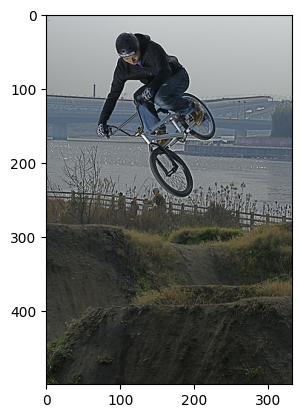

Total time taken for load_image: 0.01s
Total time taken for extract_feature: 0.16s
a man in a blue shirt is riding a bike


In [102]:
rnd_image_path=find_random_image()
plt.imshow(np.array(Image.open(rnd_image_path)))
plt.show()     
caption_words,result,attention_weights=inference.extract_caption(rnd_image_path,False)
caption=" ".join(caption_words)
print(caption)

'a woman in a black shirt and a woman and a woman in a black shirt and a black shirt'